In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.linalg import norm
from sklearn.metrics import r2_score
%matplotlib inline

In [8]:
f1=lambda x,y: np.array([x**2+y**2])
f1_grad=lambda x,y:np.array([[2*x],[2*y]])

In [43]:
def BFGS(f_grad, xk=np.array([[10], [10]]), x0=np.array([[9], [9]]), learning_rate=0.1, epsilon=0.001):
    max_iteration = 1000
    B_inv = np.eye(len(x0))
    xn_1 = np.array(xk)
    xn = np.array(x0)

    for i in range(max_iteration):
        print("Iteration:", i)
        xn_1 = np.concatenate(xn_1.reshape(1, -1))
        xn = np.concatenate(xn.reshape(1, -1))
        Dfxn_1 = f_grad(*xn_1)
        Dfxn = f_grad(*xn)
        xn_1 = xn_1.reshape(-1, 1)
        xn = xn.reshape(-1, 1)
        print("xn_1:\n", xn_1)
        print("xn:\n", xn)
        print("Dfxn_1\n", Dfxn_1)
        print("Dfxn\n", Dfxn)

        gradient_norm = norm(Dfxn)
        print("Gradient Norm:", gradient_norm)
        print("*****")

        if gradient_norm < epsilon:
            break

        delta_x = xn - xn_1
        delta_g = Dfxn - Dfxn_1
        Denominator = 1 / np.dot(delta_g.T, delta_x)

        term_1 = np.eye(len(x0)) - Denominator * np.outer(delta_x, delta_g)
        term_2 = np.eye(len(x0)) - Denominator * np.outer(delta_g, delta_x)

        B_inv = np.dot(term_1, np.dot(B_inv, term_2)) + Denominator * np.outer(delta_x, delta_x)
        print("B_inv\n", B_inv)
        print("****************")

        xn_1 = xn
        xn = xn - learning_rate * np.dot(B_inv, Dfxn)
        Dfxn_1 = Dfxn

    return xn, Dfxn, i

In [44]:
xn, Dfxn, i=BFGS(f1_grad, xk=[10,10], x0=[9,9], learning_rate=1, epsilon=0.001)
print(f"Found solution after {i+1} iterations.")
print("xy_min =\n",xn)
print("Gradient =\n",Dfxn)

Iteration: 0
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1
 [[20]
 [20]]
Dfxn
 [[18]
 [18]]
Gradient Norm: 25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
Iteration: 1
xn_1:
 [[9]
 [9]]
xn:
 [[0.]
 [0.]]
Dfxn_1
 [[18]
 [18]]
Dfxn
 [[0.]
 [0.]]
Gradient Norm: 0.0
*****
Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [49]:
f2 = lambda x, y: x**2 + x*y + y**2
f2_grad = lambda x, y: np.array([[2*x + y], [x + 2*y]])


In [50]:
xn, Dfxn, i=BFGS(f2_grad, xk=[10,10], x0=[9,9], learning_rate=0.9, epsilon=0.001)
print(f"Found solution after {i+1} iterations.")
print("xy_min =\n",xn)
print("Gradient =\n",Dfxn)

Iteration: 0
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1
 [[30]
 [30]]
Dfxn
 [[27]
 [27]]
Gradient Norm: 38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Iteration: 1
xn_1:
 [[9]
 [9]]
xn:
 [[0.9]
 [0.9]]
Dfxn_1
 [[27]
 [27]]
Dfxn
 [[2.7]
 [2.7]]
Gradient Norm: 3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Iteration: 2
xn_1:
 [[0.9]
 [0.9]]
xn:
 [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
Gradient Norm: 0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Iteration: 3
xn_1:
 [[0.09]
 [0.09]]
xn:
 [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
Gradient Norm: 0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
Iteration: 4
xn_1:
 [[0.009]
 [0.009]]
xn:
 [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
Gradien

In [51]:
f3 = lambda x, y: x**2 * y
f3_grad = lambda x, y: np.array([[2 * x * y],[x**2]])

In [53]:
xn, Dfxn, i=BFGS(f3_grad, xk=[10,10], x0=[9,9], learning_rate=1, epsilon=0.001)
print(f"Found solution after {i+1} iterations.")
print("xy_min =\n",xn)
print("Gradient =\n",Dfxn)

Iteration: 0
xn_1:
 [[10]
 [10]]
xn:
 [[9]
 [9]]
Dfxn_1
 [[200]
 [100]]
Dfxn
 [[162]
 [ 81]]
Gradient Norm: 181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
Iteration: 1
xn_1:
 [[9]
 [9]]
xn:
 [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162]
 [ 81]]
Dfxn
 [[44.87534626]
 [22.43767313]]
Gradient Norm: 50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
Iteration: 2
xn_1:
 [[4.73684211]
 [4.73684211]]
xn:
 [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
Gradient Norm: 21.536445443220426
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
Iteration: 3
xn_1:
 [[3.10344828]
 [3.10344828]]
xn:
 [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
Gradient Norm: 7.861176483398029
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
Iteration

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy.linalg import norm
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [4]:
X2=data2[:,:-1]
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [5]:
y2=data2[:,-1]
y2=y2.reshape(-1,1)
y2

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

In [6]:
x_0=np.ones((X2.shape[0],1))
X2=np.hstack((x_0,X2))
X2

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [7]:
initial_theta=np.zeros((X2.shape[1],1))
initial_theta

array([[0.],
       [0.],
       [0.],
       [0.]])

# Linear Regression +BFGS

In [34]:
def linear_regression_cost(theta, X, y):
    m = len(y)
    h = X @ theta
    cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return cost

In [35]:
def linear_regression_gradient(theta, X, y):
    m = len(y)
    h = X @ theta
    gradient = (1 / m) * X.T @ (h - y)
    return gradient,h

In [55]:
def BFGS(f_grad, X, y, learning_rate=0.1, epsilon=0.001):
    max_iteration = 1000
    n = X.shape[1]
    B_inv = np.eye(n)
    I = np.eye(n)
    weights =[]
    cost=[]
    
    theta_1 = np.zeros((n, 1))
    theta = 0.001 * np.ones((n, 1)) 
    for i in range(max_iteration):
        weights.append(theta.flatten().tolist())
        Dfxn_1,h = f_grad(theta_1, X, y)
        Dfxn,h = f_grad(theta, X, y)
        j=linear_regression_cost(theta, X, y)
        cost.append(j)

        gradient_norm = norm(Dfxn)

        if gradient_norm < epsilon:
            break
        if i > 0 and (abs(cost[i-1] - cost[i]) < 0.001):
            break    

        delta_theta = theta - theta_1
        delta_g = Dfxn - Dfxn_1
        Denominator = 1 / np.dot(delta_g.T, delta_theta)

        term_1 = I - Denominator * np.outer(delta_theta, delta_g)
        term_2 = I - Denominator * np.outer(delta_g, delta_theta)

        B_inv = np.dot(term_1, np.dot(B_inv, term_2)) + Denominator * np.outer(delta_theta, delta_theta)

        theta_1 = theta
        theta = theta - learning_rate * np.dot(B_inv, Dfxn)
    weights =np.array(weights) 

    return theta, Dfxn, i,h,weights,cost

In [56]:
theta, Dfxn, i,h,weights,cost=BFGS(linear_regression_gradient, X2, y2, learning_rate=1, epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",theta)
print("Gradient =\n",Dfxn)
print(weights.shape)

Found solution after 8 iterations.
xy_min =
 [[-4.33596563]
 [ 0.35591404]
 [ 0.54239706]
 [ 1.16758139]]
Gradient =
 [[-0.00026939]
 [-0.02397533]
 [-0.02649156]
 [-0.02126008]]
(9, 4)


In [57]:
R2=r2_score(y2, h)
print("r2_score:",R2)

r2_score: 0.9896615774127215


Text(0, 0.5, 'Loss')

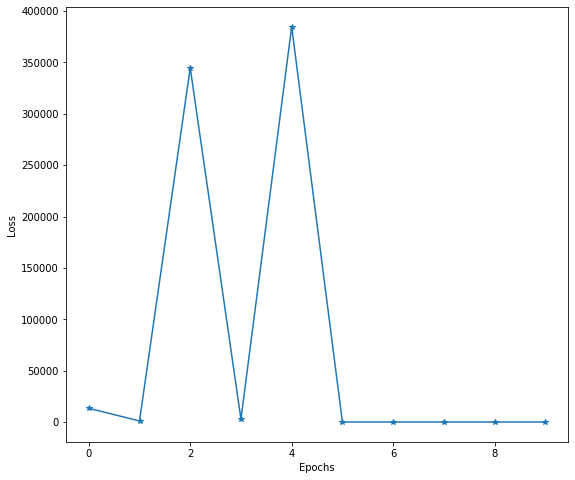

In [52]:
plt.figure(figsize=(9,8))
plt.plot(cost,'*-')
plt.xlabel('Epochs')
plt.ylabel('Loss')

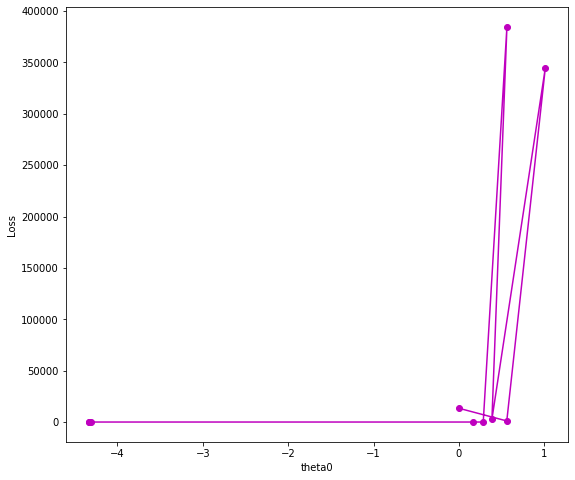

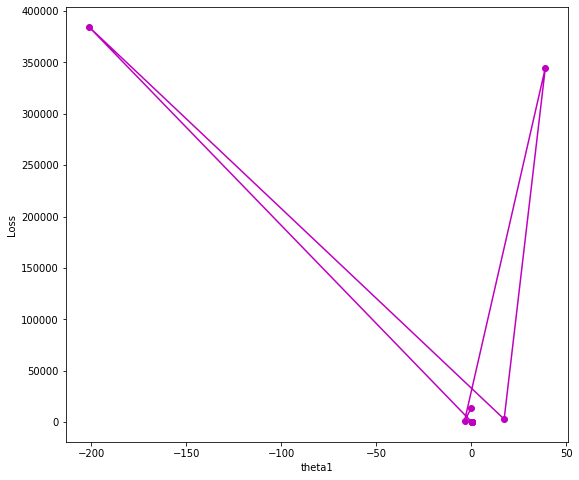

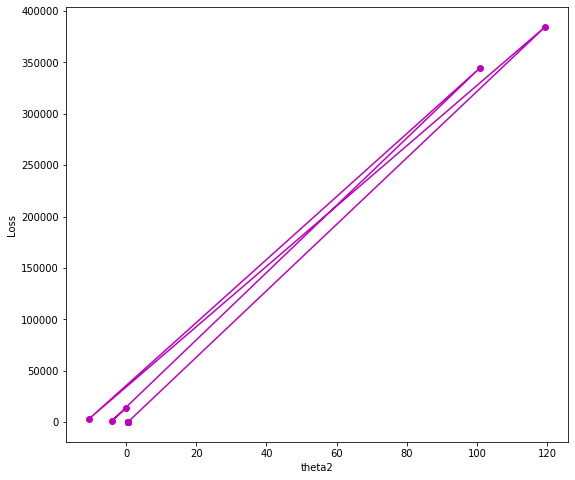

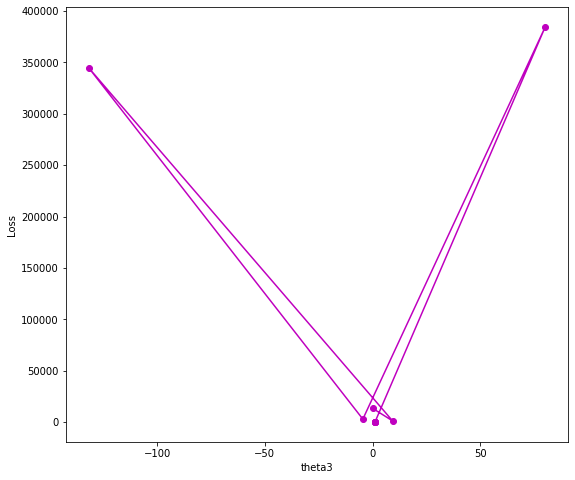

In [51]:
for i in range (weights.shape[1]):
    plt.figure(figsize=(9, 8))
    plt.plot(weights[:,i], cost,'o-',color='m')
    plt.xlabel(f'theta{i}')
    plt.ylabel('Loss')

In [58]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -(1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

def logistic_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1 / m) * (X.T @ (h - y))
    return gradient,h

In [59]:
theta, Dfxn, i,h,weights,cost=BFGS(logistic_gradient, X2, y2, learning_rate=1, epsilon=0.001)
print(f"Found solution after {i} iterations.")
print("xy_min =\n",theta)
print("Gradient =\n",Dfxn)
print(weights.shape)

Found solution after 999 iterations.
xy_min =
 [[nan]
 [nan]
 [nan]
 [nan]]
Gradient =
 [[nan]
 [nan]
 [nan]
 [nan]]
(1000, 4)


C:\Users\Dina\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Dina\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply
C:\Users\Dina\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
